In [1]:
1+2

3

In [2]:
! python --version

Python 3.11.9


In [3]:
! pip install pandas --quiet

In [4]:
! pip install scikit-learn --quiet

In [5]:
! pip install joblib --quiet

In [6]:
! pip install matplotlib --quiet

In [3]:
import pandas as pd
import numpy as np
import sklearn
import joblib
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
sklearn.set_config(transform_output='default')

## loading data

In [6]:
train_df=pd.read_csv('data/train (4).csv')
test_df=pd.read_csv('data/test (4).csv')
validation_df=pd.read_csv('data/val.csv')

In [7]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [8]:
train_df.drop(col

SyntaxError: incomplete input (2744132066.py, line 1)

## splitting data

In [9]:
def split_data(df):
    x=df.drop(columns=['price'])
    y=df.price.copy()
    return x,y

In [10]:
x_train,y_train=split_data(train_df)

In [11]:
x_train.sample(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
456,Vistara,2019-05-15,Kolkata,Banglore,07:10:00,18:50:00,700,1.0,No Info
425,Jet Airways,2019-05-15,Kolkata,Banglore,17:00:00,14:25:00,1285,1.0,In-flight meal not included
558,Goair,2019-05-01,Banglore,Delhi,20:55:00,23:40:00,165,0.0,No Info


In [12]:
x_test,y_test=split_data(test_df)
x_test.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Multiple Carriers,2019-03-03,Delhi,Cochin,18:15:00,01:35:00,440,1.0,No Info
1,Jet Airways,2019-06-01,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included
2,Multiple Carriers,2019-06-06,Delhi,Cochin,07:05:00,16:10:00,545,1.0,No Info


In [13]:
x_val,y_val=split_data(validation_df)
x_val.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Air India,2019-06-01,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info
1,Air India,2019-03-03,Delhi,Cochin,20:00:00,19:15:00,1395,2.0,No Info
2,Air India,2019-03-06,Mumbai,Hyderabad,05:55:00,22:00:00,965,1.0,No Info


In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


## data preprocessing

In [15]:
num_cols=['duration','total_stops']
date_cols=['date_of_journey','arrival_time','dep_time']
cat_cols=[col for col in x_train.columns if (col not in num_cols) and (col not in date_cols)]
cat_cols

['airline', 'source', 'destination', 'additional_info']

In [16]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

In [17]:
from sklearn.pipeline import make_pipeline,Pipeline

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [20]:
cat_pipe=Pipeline([
    ('imputer1',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [21]:
! pip install feature-engine --quiet

In [22]:
from feature_engine.datetime import DatetimeFeatures

In [23]:
date_pipe=Pipeline([
    ('imputer2',SimpleImputer(strategy='most_frequent')),
    ('date',DatetimeFeatures(features_to_extract=['month','week','day_of_week','day_of_month'],format='mixed')),
    ('scaler',StandardScaler())
])

In [24]:
time_pipe=Pipeline([
    ('imputer2',SimpleImputer(strategy='most_frequent')),
    ('date',DatetimeFeatures(features_to_extract=['hour','minute'],format='mixed')),
    ('scaler',StandardScaler())
])

In [25]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols),
    ('date',date_pipe,['date_of_journey']),
    ('time',time_pipe,['arrival_time','dep_time'])
])
    

In [26]:
preprocessor.fit_transform(x_train)

array([[-1.09591823, -1.21213152,  0.        , ...,  1.49385907,
        -0.46205514, -0.14005709],
       [ 1.43569944,  0.31797533,  0.        , ...,  0.89104078,
        -0.64095127, -1.22986299],
       [ 1.82441239,  1.84808218,  0.        , ..., -1.21882323,
        -0.64095127, -0.68496004],
       ...,
       [-0.94641325, -1.21213152,  0.        , ...,  1.49385907,
        -1.17763964, -0.95741152],
       [ 0.18982461,  0.31797533,  0.        , ..., -1.52023237,
        -0.81984739,  1.22220029],
       [ 0.63833955,  0.31797533,  0.        , ..., -1.52023237,
         1.32690609, -1.22986299]])

## model selection

In [ ]:
! pip install xgboost --quiet

In [28]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [29]:
algorithms={
    'lr':LinearRegression(),
    'svr':SVR(),
    'rfr':RandomForestRegressor(),
    'xgr':XGBRegressor(),
    'gbr':GradientBoostingRegressor()
}

In [30]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [31]:
data=pd.concat([train_df,validation_df],axis=0)
x_data,y_data=split_data(data)
x_data.shape,y_data.shape

((800, 9), (800,))

In [32]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [33]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=x_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()

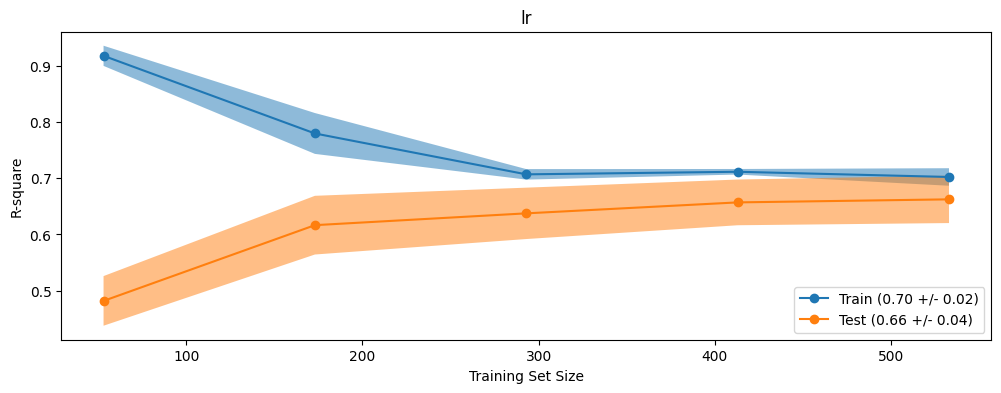

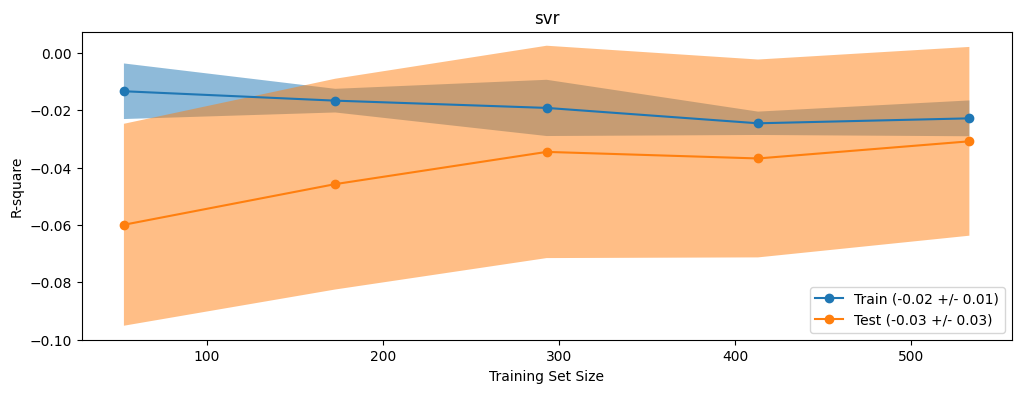

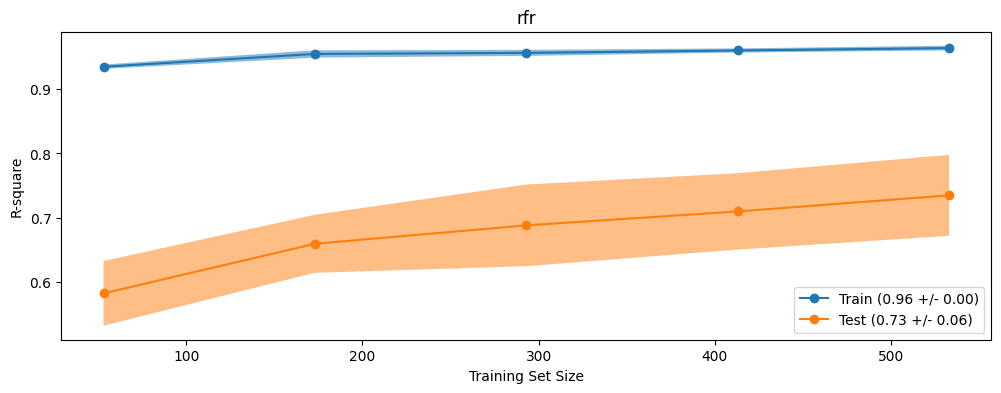

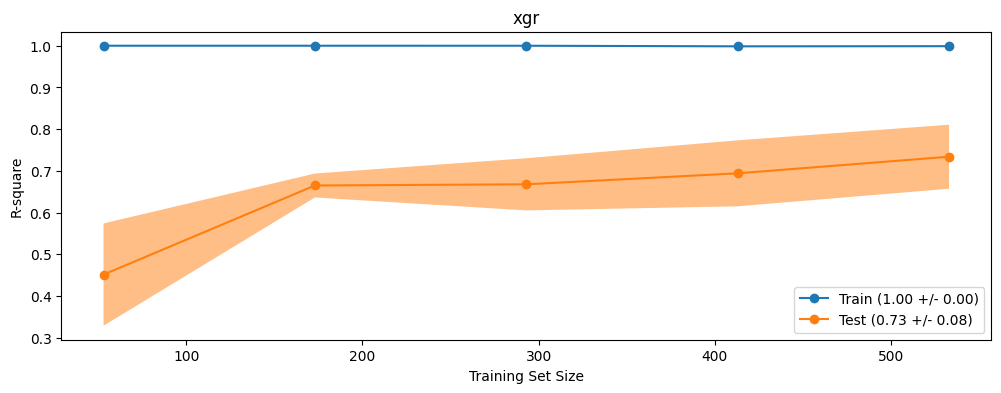

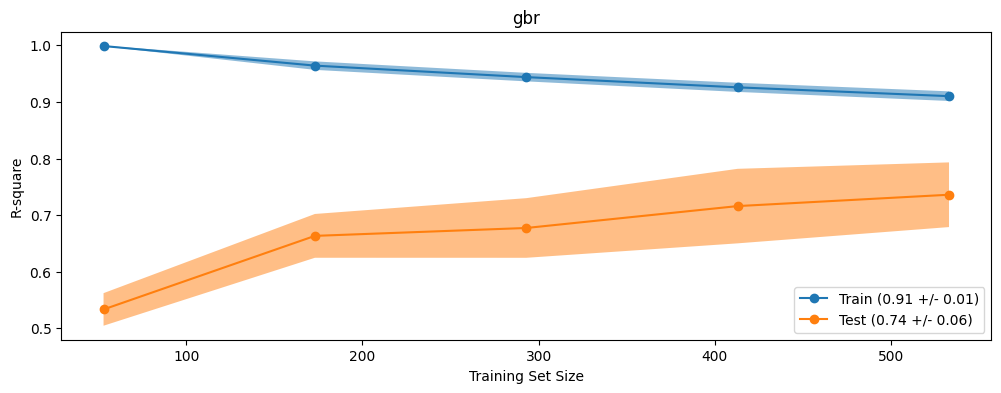

In [34]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

In [35]:
model = Pipeline(steps=[
	("pre", preprocessor),
	("rf", RandomForestRegressor(n_estimators=10))
])

In [36]:
model.fit(x_data,y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('date',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['arrival_time',
                                                   'dep_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [37]:
def evaluvate_model(x,y,):
    y_pred=model.predict(x)
    return r2_score(y,y_pred)

In [38]:
evaluvate_model(x_data,y_data)

0.9480609726863563

In [39]:
evaluvate_model(x_test,y_test)

0.6971874666415567

In [40]:
joblib.dump(model,'model.joblib')

['model.joblib']

In [41]:
saved_model=joblib.load('model.joblib')
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('date',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['arrival_time',
                                                   'dep_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])